In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
import h5py
from collections import Counter
from sklearn.manifold import TSNE

In [5]:
### D1.001 SIGN0 ###

D1001_sign0 = "/aloy/home/acomajuncosa/Protocols/local_CC_D1/full/D/D1/D1.001/sign0/sign0.h5"
with h5py.File(D1001_sign0) as h5:
    D1001_sign0 = np.array(h5['keys'])
D1001_sign0 = set([i.decode('utf-8') for i in D1001_sign0])


### D1.002 SIGN0 ###

D1002_sign0 = "/aloy/home/acomajuncosa/Protocols/local_CC_D1/full/D/D1/D1.002/sign0/sign0.h5"
with h5py.File(D1002_sign0) as h5:
    D1002_sign0 = np.array(h5['keys'])
D1002_sign0 = set([i.decode('utf-8') for i in D1002_sign0])

print(len(D1001_sign0), len(D1002_sign0))

14098 11065


In [6]:
print(len(D1001_sign0.intersection(D1002_sign0)))

6512


In [24]:
# GET TYPE III SIGNATURE IF IT'S IN SIGN0  --  D1.001

with h5py.File("/aloy/web_checker/current/full/D/D1/D1.001/sign3/sign3.h5") as h5:
    keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
    ind = np.array([c for c,i in enumerate(keys) if i in D1001_sign0])
    X_D1001 = h5['V'][ind]
    keys_D1001 = keys[ind]

print(X_D1001.shape, len(keys_D1001))

# GET TYPE III SIGNATURE IF IT'S IN SIGN0  --  D1.002

with h5py.File("/aloy/home/acomajuncosa/Protocols/local_CC_D1/full/D/D1/D1.002/sign3/sign3.h5") as h5:
    keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
    ind = np.array([c for c,i in enumerate(keys) if i in D1002_sign0])
    X_D1002 = h5['V'][ind]
    keys_D1002 = keys[ind]

print(X_D1002.shape, len(keys_D1002))

(14098, 128) 14098
(11065, 128) 11065


In [25]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=4)
X_D1001_tSNE = tsne.fit_transform(X_D1001)

tsne = TSNE(n_components=2, random_state=42, n_jobs=4)
X_D1002_tSNE = tsne.fit_transform(X_D1002)

In [13]:
# RECAPITULATION MOA SIGN3 D1.001
ATC_ROC_D1001 = pickle.load(open("/aloy/web_checker/current/full/D/D1/D1.001/sign3/diags/2021_07_sign0_bkp/atc_roc.pkl", "rb"))
MOA_ROC_D1001 = pickle.load(open("/aloy/web_checker/current/full/D/D1/D1.001/sign3/diags/2021_07_sign0_bkp/moa_roc.pkl", "rb"))

# RECAPITULATION MOA SIGN3 D1.002
ATC_ROC_D1002 = pickle.load(open("/aloy/home/acomajuncosa/Protocols/local_CC_D1/full/D/D1/D1.002/sign3/diags/local_CC_D1_sign0/atc_roc.pkl", "rb"))
MOA_ROC_D1002 = pickle.load(open("/aloy/home/acomajuncosa/Protocols/local_CC_D1/full/D/D1/D1.002/sign3/diags/local_CC_D1_sign0/moa_roc.pkl", "rb"))

In [91]:
# READ B1.001 and create dict: InChIKey to feature
B1_KEYS_TO_FEATURES = {}
with h5py.File("/aloy/web_checker/current/full/B/B1/B1.001/sign0/sign0.h5") as h5:
    X = h5['V'][:]
    keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
    features = np.array([i.decode('utf-8') for i in h5['features'][:]])
for i,j in zip(X, keys):
    B1_KEYS_TO_FEATURES[j] = features[np.where(i != 0)[0]]

# READ E1.001 and create dict: InChIKey to feature
E1_KEYS_TO_FEATURES = {}
with h5py.File("/aloy/web_checker/current/full/E/E1/E1.001/sign0/sign0.h5") as h5:
    X = h5['V'][:]
    keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
    features = np.array([i.decode('utf-8') for i in h5['features'][:]])
for i,j in zip(X, keys):
    E1_KEYS_TO_FEATURES[j] = features[np.where(i != 0)[0]]

annotations = pickle.load(open("/aloy/home/ddalton/area_52/scripts/annotations/data/d_cc_annotations.pkl", "rb"))
print(len(B1_KEYS_TO_FEATURES), len(E1_KEYS_TO_FEATURES))

3972 4849


In [92]:
count_dict_B1 = Counter([j for i in B1_KEYS_TO_FEATURES for j in B1_KEYS_TO_FEATURES[i]])
count_dict_E1 = Counter([j for i in E1_KEYS_TO_FEATURES for j in E1_KEYS_TO_FEATURES[i]])

In [160]:
feature_B1 = 'Class:11(-1)'
feature_B1 = 'Class:1285(-1)'
feature_E1 = 'B:J01'

In [161]:
[i + " -- " + str(count_dict_B1[i]) for i in sorted(count_dict_B1, key=lambda x: count_dict_B1[x])][::-1][:25]

['Class:0(-1) -- 2993',
 'Class:1(-1) -- 1585',
 'Class:0(1) -- 965',
 'Class:11(-1) -- 798',
 'Class:1020(-1) -- 745',
 'Class:1088(-1) -- 570',
 'Class:11(1) -- 504',
 'Class:1266(-1) -- 485',
 'Class:1020(1) -- 436',
 'Class:6(-1) -- 435',
 'Class:1100(-1) -- 424',
 'Class:1005(-1) -- 402',
 'Class:10(-1) -- 323',
 'Class:1088(1) -- 295',
 'Class:12(1) -- 292',
 'Class:1033(1) -- 277',
 'Class:1028(-1) -- 271',
 'Class:1006(-1) -- 266',
 'Class:1285(-1) -- 235',
 'Class:1019(-1) -- 232',
 'Class:1266(1) -- 226',
 'Class:643(-1) -- 218',
 'Class:689(-1) -- 217',
 'Class:1032(-1) -- 217',
 'Class:1082(-1) -- 182']

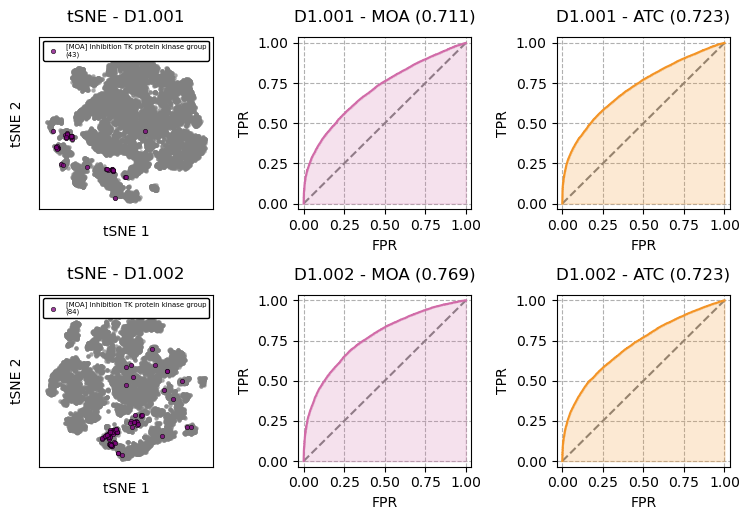

In [164]:
# Create a figure with a specific size
fig = plt.figure(figsize=(7.6, 5.3))

# Define the GridSpec
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

# tSNE1 D1.001
ax = plt.subplot(gs[0, 0])
ax.set_xlabel("tSNE 1", labelpad=11)
ax.set_ylabel("tSNE 2", labelpad=11)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(X_D1001_tSNE[:,0], X_D1001_tSNE[:,1], alpha=0.7, lw=0, c='gray', s=10)
ax.set_title("tSNE - D1.001", pad=11)
X_feat_B1 = np.array([i for i,j in zip(X_D1001_tSNE, keys_D1001) if j in B1_KEYS_TO_FEATURES and feature_B1 in B1_KEYS_TO_FEATURES[j]])
ax.scatter(X_feat_B1[:,0], X_feat_B1[:,1], alpha=0.75, lw=0.5, c='purple', s=10, ec='k', label="[MOA] " + annotations['B1'][feature_B1] + "\n(" + str(len(X_feat_B1)) + ")")
ax.legend(framealpha=1, edgecolor='k', prop={'size': 5}, loc='upper center')


# tSNE1 D1.002
ax = plt.subplot(gs[1, 0])
ax.set_xlabel("tSNE 1", labelpad=11)
ax.set_ylabel("tSNE 2", labelpad=11)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(X_D1002_tSNE[:,0], X_D1002_tSNE[:,1], alpha=0.7, lw=0, c='gray', s=10)
ax.set_title("tSNE - D1.002", pad=11)
X_feat_B1 = np.array([i for i,j in zip(X_D1002_tSNE, keys_D1002) if j in B1_KEYS_TO_FEATURES and feature_B1 in B1_KEYS_TO_FEATURES[j]])
ax.scatter(X_feat_B1[:,0], X_feat_B1[:,1], alpha=0.75, lw=0.5, c='purple', s=10, ec='k', label="[MOA] " + annotations['B1'][feature_B1] + "\n(" + str(len(X_feat_B1)) + ")")
ax.legend(framealpha=1, edgecolor='k', prop={'size': 5}, loc='upper center')


        
labels = ["D1.001 - MOA (" + str(round(MOA_ROC_D1001['auc'], 3)) + ")", "D1.001 - ATC (" + str(round(ATC_ROC_D1001['auc'], 3)) + ")"]
colors = ['#D16BA8', '#F39426']
for c, p1 in enumerate([MOA_ROC_D1001, ATC_ROC_D1001]):
    ax = plt.subplot(gs[0, c+1])
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.grid(linestyle='--', zorder=-2)
    ax.set_xlim([-0.035, 1.035])
    ax.set_ylim([-0.035, 1.035])
    ax.plot([0, 1], [0, 1], c='gray', linestyle='--')
    ax.set_title(labels[c], pad=11)
    ax.plot(p1['fpr'], p1['tpr'], c=colors[c], zorder=2)
    ax.fill_between(p1['fpr'], p1['tpr'], y2=0, color=colors[c], zorder=2, alpha=0.2)
    
labels = ["D1.002 - MOA (" + str(round(MOA_ROC_D1002['auc'], 3)) + ")", "D1.002 - ATC (" + str(round(ATC_ROC_D1002['auc'], 3)) + ")"]
for c, p2 in enumerate([MOA_ROC_D1002, ATC_ROC_D1002]):
    ax = plt.subplot(gs[1, c+1])
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.grid(linestyle='--', zorder=-2)
    ax.set_xlim([-0.035, 1.035])
    ax.set_ylim([-0.035, 1.035])
    ax.plot([0, 1], [0, 1], c='gray', linestyle='--')
    ax.set_title(labels[c], pad=11)
    ax.plot(p2['fpr'], p2['tpr'], c=colors[c], zorder=2)
    ax.fill_between(p2['fpr'], p2['tpr'], y2=0, color=colors[c], zorder=2, alpha=0.2)
    

# Adjust layout
plt.tight_layout()
plt.savefig("/aloy/home/acomajuncosa/Protocols/figures/Protocol/FigS6.png", dpi=300)
plt.show()